Data Analyst: Retail challenge

In [1]:
# import packages
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
# load data

# Contains a record for each of BigSupplyCo’s department stores where customers can make a purchase. 
departments = pd.read_csv("data/BigSupplyCo_Departments.csv")
# Contains a record of each product category available to order from BigSupplyCo.
categories = pd.read_csv("data/BigSupplyCo_Categories.csv")
# Contains a record for each of the products sold by BigSupplyCo.
products = pd.read_csv("data/BigSupplyCo_Products.csv")
# Contains a record for each of BigSupplyCo’s customers
customers = pd.read_csv("data/BigSupplyCo_Customers.csv")
# Contains records for created orders for BigSupplyCo. 
orders = pd.read_csv("data/BigSupplyCo_Orders-CLEANED.csv", parse_dates=["order_date", "order_date_only"])


## Departments - Initial exploration

In [3]:

print(departments.head())
print(departments.tail())
departments.info()
# departments.describe() - not relevant since the numerical columns are the IDs and lat/lon

   Department Id Department Name   Latitude   Longitude
0              2         Fitness  18.251453  -66.037056
1              2         Fitness  18.279451  -66.037064
2              2         Fitness  37.292233 -121.881279
3              2         Fitness  34.125946 -118.291016
4              2         Fitness  18.253769  -66.037048
       Department Id Department Name   Latitude   Longitude
41951              7        Fan Shop  34.045147 -118.248482
41952              7        Fan Shop  18.229948  -66.370560
41953              7        Fan Shop  18.264967  -66.370636
41954              7        Fan Shop  32.801689 -116.978561
41955              7        Fan Shop  37.623436 -121.119720
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41956 entries, 0 to 41955
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department Id    41956 non-null  int64  
 1   Department Name  41956 non-null  object 
 2   Latitud

In [ ]:
# Total count of department stores: 41956 

In [4]:
# How many of each department type does BigSupplyCo have?

print(departments[["Department Id", "Department Name"]].value_counts())
print(departments[["Department Id", "Department Name"]].value_counts(normalize=True))

Department Id  Department Name   
4              Apparel               8997
7              Fan Shop              8541
5              Golf                  7663
3              Footwear              5939
6              Outdoors              4966
2              Fitness               1905
9              Discs Shop            1564
10             Technology            1283
8              Book Shop              390
11             Pet Shop               356
12             Health and Beauty      352
Name: count, dtype: int64
Department Id  Department Name   
4              Apparel               0.214439
7              Fan Shop              0.203570
5              Golf                  0.182644
3              Footwear              0.141553
6              Outdoors              0.118362
2              Fitness               0.045405
9              Discs Shop            0.037277
10             Technology            0.030580
8              Book Shop             0.009295
11             Pet Shop       

/var/folders/7m/35g34s3d76gcw7gzl9crz2tm0000gn/T/ipykernel_6965/1112295047.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  department_countplot.set_xticklabels(department_countplot.get_xticklabels(), rotation=70)


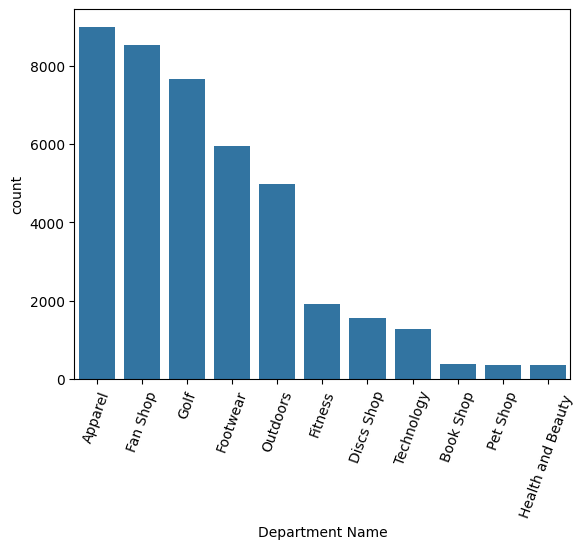

In [5]:
# Visualize using a countplot, in descending order based on frequency
department_countplot = sns.countplot(data=departments, x="Department Name", order=departments["Department Name"].value_counts().index)

department_countplot.set_xticklabels(department_countplot.get_xticklabels(), rotation=70)
plt.show()

The top five BigSupplyCo departments, based on number of stores, are: Apparel, Fan Shop, Golf, Footwear, and Outdoors.

In [ ]:
# Rename departments columns for readability 
# departments.columns = departments.columns.str.replace("Department ", "")
# print(departments.columns)

## Categories - Data cleaning and initial exploration

In [6]:
print(categories)
categories.info()
# categories.describe() - not relevant since the only numerical columns is ID

    Category Id         Category Name
0            73        Sporting Goods
1            17                Cleats
2            29         Shop By Sport
3            24       Women's Apparel
4            13           Electronics
5            12          Boxing & MMA
6             9      Cardio Equipment
7            41              Trade-In
8            37           Electronics
9            38      Kids' Golf Clubs
10           44    Hunting & Shooting
11            3   Baseball & Softball
12           18        Men's Footwear
13           43      Camping & Hiking
14           65  Consumer Electronics
15           62              Cameras 
16           64             Computers
17            4            Basketball
18            2                Soccer
19           26        Girls' Apparel
20           40           Accessories
21           76      Women's Clothing
22           66                Crafts
23           70        Men's Clothing
24            6      Tennis & Racquet
25          

In [7]:
# check for duplicates
# print(categories[["Category Id", "Category Name"]].value_counts().sort_index(ascending=True))
categories["Duplicate category?"] = categories.duplicated(subset=["Category Name"], keep=False)
print(categories)


    Category Id         Category Name  Duplicate category?
0            73        Sporting Goods                False
1            17                Cleats                False
2            29         Shop By Sport                False
3            24       Women's Apparel                False
4            13           Electronics                 True
5            12          Boxing & MMA                False
6             9      Cardio Equipment                False
7            41              Trade-In                False
8            37           Electronics                 True
9            38      Kids' Golf Clubs                False
10           44    Hunting & Shooting                False
11            3   Baseball & Softball                False
12           18        Men's Footwear                False
13           43      Camping & Hiking                False
14           65  Consumer Electronics                False
15           62              Cameras                 Fal

There is one duplicated category name, "Electronics" (IDs 13 and 37). Effectively there are **50 product categories**.
There are some category names that are very similar to each other or don't seem to have very clear distinctions, e.g. "Electronics" and "Consumer Electronics"; and categories that have degrees of overlap, e.g. "Shop by Sport" and "Hockey", "Music" and "CDs", etc. 

In [ ]:
# Rename categories columns for readability 
# categories.columns = categories.columns.str.replace("Category ", "")
# print(categories.columns)

In [8]:
# clean up extra whitespaces
categories["Category Name"] = categories["Category Name"].str.rstrip()
categories["Category Name"] = categories["Category Name"].str.replace("  ", " ")
print(categories["Category Name"])

0           Sporting Goods
1                   Cleats
2            Shop By Sport
3          Women's Apparel
4              Electronics
5             Boxing & MMA
6         Cardio Equipment
7                 Trade-In
8              Electronics
9         Kids' Golf Clubs
10      Hunting & Shooting
11     Baseball & Softball
12          Men's Footwear
13        Camping & Hiking
14    Consumer Electronics
15                 Cameras
16               Computers
17              Basketball
18                  Soccer
19          Girls' Apparel
20             Accessories
21        Women's Clothing
22                  Crafts
23          Men's Clothing
24        Tennis & Racquet
25     Fitness Accessories
26          As Seen on TV!
27              Golf Balls
28       Strength Training
29     Children's Clothing
30                Lacrosse
31                    Baby
32                 Fishing
33                   Books
34                    DVDs
35                     CDs
36                  Garden
3

## Products - Data cleaning and initial exploration

In [9]:
print(products.head())
print(products.tail())
products.info()

   Product Card Id  Product Category Id  Product Description  \
0             1360                   73                  NaN   
1              365                   17                  NaN   
2              627                   29                  NaN   
3              502                   24                  NaN   
4              278                   13                  NaN   

                                       Product Image  \
0       http://images.acmesports.sports/Smart+watch    
1  http://images.acmesports.sports/Perfect+Fitnes...   
2  http://images.acmesports.sports/Under+Armour+G...   
3  http://images.acmesports.sports/Nike+Men%27s+D...   
4  http://images.acmesports.sports/Under+Armour+M...   

                                    Product Name  Product Price  \
0                                   Smart watch      327.750000   
1               Perfect Fitness Perfect Rip Deck      59.990002   
2  Under Armour Girls' Toddler Spine Surge Runni      39.990002   
3         

Entire "Product Description" column is null. Note that the column was imported as a float. 

In [10]:
print(products["Product Price"].describe())
print(products[["Product Name", "Product Price"]].sort_values("Product Price", ascending=False))

count     118.000000
mean      166.412966
std       262.184328
min         9.990000
25%        31.990000
50%        87.195000
75%       199.990005
max      1999.989990
Name: Product Price, dtype: float64
                               Product Name  Product Price
89                      SOLE E35 Elliptical     1999.98999
20                              Dell Laptop     1500.00000
21                      SOLE E25 Elliptical      999.98999
88        Bowflex SelectTech 1090 Dumbbells      599.98999
85   Bushnell Pro X7 Jolt Slope Rangefinder      599.98999
..                                      ...            ...
91            Hirzl Men's Hybrid Golf Glove       14.99000
90          Hirzl Women's Hybrid Golf Glove       14.99000
114                                   Toys        11.54000
64                              CDs of rock       11.29000
95                  Clicgear 8.0 Shoe Brush        9.99000

[118 rows x 2 columns]


In [11]:
#sns.boxplot(data=products, x="Product Name", y="Product Price")

In [12]:
# clean up extra whitespaces
products["Product Name"] = products["Product Name"].str.rstrip()

In [ ]:
# take a closer look at product names
#print(products["Product Name"].value_counts().sort_index(ascending=True))


In [13]:


# Join product categories table with products
new_df = pd.merge(products, categories, how="left", left_on="Product Category Id", right_on="Category Id")
print(new_df.info())
print(new_df.head())
print(new_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Card Id      118 non-null    int64  
 1   Product Category Id  118 non-null    int64  
 2   Product Description  0 non-null      float64
 3   Product Image        118 non-null    object 
 4   Product Name         118 non-null    object 
 5   Product Price        118 non-null    float64
 6   Product Status       118 non-null    int64  
 7   Category Id          118 non-null    int64  
 8   Category Name        118 non-null    object 
 9   Duplicate category?  118 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 8.5+ KB
None
   Product Card Id  Product Category Id  Product Description  \
0             1360                   73                  NaN   
1              365                   17                  NaN   
2              627         

Some products may be incorrectly categorized (e.g. Product Name: Nike Men's Dri-FIT Victory Golf Polo, Product Category Id: 24, Category Name: Women's Apparel)

We will not use product category as a data point in our analysis, but would recommend further validating the incorrect categorization, and exploring why this happened, and also why the product descriptions are entirely missing.

## Customers - Data cleaning and initial exploration

In [14]:
print(customers.head())
print(customers.tail())
customers.info()
# customers.describe()

   Customer Id Customer City Customer Country Customer Email Customer Fname  \
0        20755        Caguas      Puerto Rico      XXXXXXXXX          Cally   
1        19492        Caguas      Puerto Rico      XXXXXXXXX          Irene   
2        19491      San Jose          EE. UU.      XXXXXXXXX        Gillian   
3        19490   Los Angeles          EE. UU.      XXXXXXXXX           Tana   
4        19489        Caguas      Puerto Rico      XXXXXXXXX           Orli   

  Customer Lname Customer Password Customer Segment Customer State  \
0       Holloway         XXXXXXXXX         Consumer             PR   
1           Luna         XXXXXXXXX         Consumer             PR   
2      Maldonado         XXXXXXXXX         Consumer             CA   
3           Tate         XXXXXXXXX      Home Office             CA   
4      Hendricks         XXXXXXXXX        Corporate             PR   

            Customer Street  Customer Zipcode  
0  5365 Noble Nectar Island             725.0  
1       

In [15]:
# closer look at null values
print(customers[customers.isna().any(axis=1)])

       Customer Id Customer City Customer Country Customer Email  \
10811        14577            CA          EE. UU.      XXXXXXXXX   
11848        17937        Caguas      Puerto Rico      XXXXXXXXX   
12465        17171            CA          EE. UU.      XXXXXXXXX   
12751        14909      Palatine          EE. UU.      XXXXXXXXX   
15954        14046            CA          EE. UU.      XXXXXXXXX   
16211        18347   Los Angeles          EE. UU.      XXXXXXXXX   
16803        17354        Caguas      Puerto Rico      XXXXXXXXX   
17371        14446   San Antonio          EE. UU.      XXXXXXXXX   
18034        14870  Fayetteville          EE. UU.      XXXXXXXXX   
19985        17929      Honolulu          EE. UU.      XXXXXXXXX   
20068        20439        Reseda          EE. UU.      XXXXXXXXX   

      Customer Fname Customer Lname Customer Password Customer Segment  \
10811           Sara        Foreman         XXXXXXXXX         Consumer   
11848            May            NaN

Missing last names may be due to incorrect data entry. We'll leave them for now.

Customers 14577, 17171, 14046 have missing zipcodes, but looking at their Customer State values there appears to be a zip code value there instead, while their Customer City values are "CA", and their Customer Street values do not have street numbers but instead contain names of cities in California. This implies a data entry error and we can just re-set the corresponding columns with the correct values, and leave Customer Street as null (unknown).

In [16]:
# Move address part values to correct columns

# select dataframe of customers and addresses to update
#customer_address_to_update = customers.iloc[[10811, 12465, 15954]]


#print(customer_address_to_update)

# 1. Set Zipcode as current State value

customers.loc[[10811, 12465, 15954],"Customer Zipcode"] = customers.loc[[10811, 12465, 15954],"Customer State"].astype(float)
#print(customer_address_to_update)

# 2. Set State as current City value

customers.loc[[10811, 12465, 15954], "Customer State"] = customers.loc[[10811, 12465, 15954], "Customer City"]
#print(customer_address_to_update)

# 3. Set City as current Street value
customers.loc[[10811, 12465, 15954], "Customer City"] = customers.loc[[10811, 12465, 15954], "Customer Street"]
#print(customer_address_to_update)

# 4. Set Street as NULL
customers.loc[[10811, 12465, 15954], "Customer Street"] = np.nan
#print(customer_address_to_update)
print(customers.iloc[10811])
print(customers.loc[[10811, 12465, 15954],"Customer Zipcode"])

Customer Id              14577
Customer City        Elk Grove
Customer Country       EE. UU.
Customer Email       XXXXXXXXX
Customer Fname            Sara
Customer Lname         Foreman
Customer Password    XXXXXXXXX
Customer Segment      Consumer
Customer State              CA
Customer Street            NaN
Customer Zipcode       95758.0
Name: 10811, dtype: object
10811    95758.0
12465    95758.0
15954    91732.0
Name: Customer Zipcode, dtype: float64


In [17]:
print(customers[customers.isna().any(axis=1)])

       Customer Id Customer City Customer Country Customer Email  \
10811        14577     Elk Grove          EE. UU.      XXXXXXXXX   
11848        17937        Caguas      Puerto Rico      XXXXXXXXX   
12465        17171     Elk Grove          EE. UU.      XXXXXXXXX   
12751        14909      Palatine          EE. UU.      XXXXXXXXX   
15954        14046      El Monte          EE. UU.      XXXXXXXXX   
16211        18347   Los Angeles          EE. UU.      XXXXXXXXX   
16803        17354        Caguas      Puerto Rico      XXXXXXXXX   
17371        14446   San Antonio          EE. UU.      XXXXXXXXX   
18034        14870  Fayetteville          EE. UU.      XXXXXXXXX   
19985        17929      Honolulu          EE. UU.      XXXXXXXXX   
20068        20439        Reseda          EE. UU.      XXXXXXXXX   

      Customer Fname Customer Lname Customer Password Customer Segment  \
10811           Sara        Foreman         XXXXXXXXX         Consumer   
11848            May            NaN

In [18]:
# print(customers.iloc[197,:])

# convert zipcode values to strings
customers["Customer Zipcode"] = customers["Customer Zipcode"].astype(str)
customers.info()
print(customers.iloc[197,:])
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer Id        20652 non-null  int64 
 1   Customer City      20652 non-null  object
 2   Customer Country   20652 non-null  object
 3   Customer Email     20652 non-null  object
 4   Customer Fname     20652 non-null  object
 5   Customer Lname     20644 non-null  object
 6   Customer Password  20652 non-null  object
 7   Customer Segment   20652 non-null  object
 8   Customer State     20652 non-null  object
 9   Customer Street    20649 non-null  object
 10  Customer Zipcode   20652 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB
Customer Id                              8519
Customer City                    Granite City
Customer Country                      EE. UU.
Customer Email                      XXXXXXXXX
Customer Fname                         Pamela

,Customer Id,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode
0,20755,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0
1,19492,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0
2,19491,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0
3,19490,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0
4,19489,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0


In [19]:
# remove trailing `.0` chars from zipcode strings
#customers["Customer Zipcode"]

customers["Customer Zipcode"] = customers["Customer Zipcode"].str.split(".").str[0]
print(customers.iloc[197,:])
customers.head()


Customer Id                              8519
Customer City                    Granite City
Customer Country                      EE. UU.
Customer Email                      XXXXXXXXX
Customer Fname                         Pamela
Customer Lname                        Michael
Customer Password                   XXXXXXXXX
Customer Segment                     Consumer
Customer State                             IL
Customer Street      1585 Stony Rabbit Hollow
Customer Zipcode                        62040
Name: 197, dtype: object


,Customer Id,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode
0,20755,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725
1,19492,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725
2,19491,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125
3,19490,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027
4,19489,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725


In [20]:
# Add leading zeroes for zip codes
# customers["Customer Zipcode"].str.len() == 3]["Customer Zipcode"].str.pad(5, fillchar="0")

customers.loc[customers["Customer Zipcode"].str.len() < 5, "Customer Zipcode"] = customers["Customer Zipcode"].str.pad(5, fillchar="0")
customers.head()


,Customer Id,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode
0,20755,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,00725
1,19492,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,00725
2,19491,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125
3,19490,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027
4,19489,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,00725


In [21]:
print(customers.iloc[197,:])

Customer Id                              8519
Customer City                    Granite City
Customer Country                      EE. UU.
Customer Email                      XXXXXXXXX
Customer Fname                         Pamela
Customer Lname                        Michael
Customer Password                   XXXXXXXXX
Customer Segment                     Consumer
Customer State                             IL
Customer Street      1585 Stony Rabbit Hollow
Customer Zipcode                        62040
Name: 197, dtype: object


In [22]:
# What's the frequency of each zipcode? City? State? Country? 
print(customers[["Customer Country"]].value_counts())
print(customers[["Customer Country"]].value_counts(normalize=True))
print(customers[["Customer State", "Customer Country"]].value_counts())
print(customers[["Customer State", "Customer Country"]].value_counts(normalize=True))

Customer Country
EE. UU.             12719
Puerto Rico          7933
Name: count, dtype: int64
Customer Country
EE. UU.             0.615873
Puerto Rico         0.384127
Name: proportion, dtype: float64
Customer State  Customer Country
PR              Puerto Rico         7933
CA              EE. UU.             3321
NY              EE. UU.             1278
TX              EE. UU.             1088
IL              EE. UU.              855
FL              EE. UU.              583
OH              EE. UU.              465
MI              EE. UU.              427
PA              EE. UU.              426
NJ              EE. UU.              381
AZ              EE. UU.              372
GA              EE. UU.              312
MD              EE. UU.              264
VA              EE. UU.              235
NC              EE. UU.              230
CO              EE. UU.              214
MA              EE. UU.              198
OR              EE. UU.              193
NV              EE. UU.   

More than a third of customers are located in Puerto Rico alone. About another third of customers come from top 5 states (excluding Puerto Rico): California, New York, Texas, Illinois, and Florida. 

In [23]:
print(orders.head(10))
print(orders.tail(10))
orders.info()
orders[["order_item_discount", "order_item_discount_rate", "order_item_quantity", "sales", "order_item_total", "order_profit_from_order", \
        "days_for_shipping_real", "days_for_shipping_scheduled"]].describe()

   order_id  order_item_cardprod_id  order_customer_id  order_department_id  \
0     77202                    1360              20755                    2   
1     75924                    1360              19477                    2   
2     75903                    1360              19456                    2   
3     75902                    1360              19455                    2   
4     75901                    1360              19454                    2   
5     75900                    1360              19453                    2   
6     12525                     917               4936                    6   
7      5895                     191               8707                    3   
8     56359                     365               1025                    4   
9     51298                     627               9272                    5   

         market  order_city  order_country     order_region  \
0  Pacific Asia      Bekasi      Indonesia   Southeast Asia   
1  P

,order_item_discount,order_item_discount_rate,order_item_quantity,sales,order_item_total,order_profit_from_order,days_for_shipping_real,days_for_shipping_scheduled
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,20.664741,0.101668,2.127638,203.772096,183.107609,21.974989,3.497654,2.931847
std,21.800901,0.070415,1.453451,132.273077,120.043670,104.433526,1.623722,1.374449
min,0.000000,0.000000,1.000000,9.990000,7.490000,-4274.979980,0.000000,0.000000
25%,5.400000,0.040000,1.000000,119.980003,104.379997,7.000000,2.000000,2.000000
50%,14.000000,0.100000,1.000000,199.919998,163.990005,31.520000,3.000000,4.000000
75%,29.990000,0.160000,3.000000,299.950012,247.399994,64.800003,5.000000,4.000000
max,500.000000,0.250000,5.000000,1999.989990,1939.989990,911.799988,6.000000,4.000000


In [ ]:
# 180519 orders from 20652 customers

In [24]:
# What's the frequency of each destination zipcode? City? State? Country? 
print(orders[["order_country"]].value_counts())
print(orders[["order_country"]].value_counts(normalize=True))
print(orders[["order_state", "order_country"]].value_counts().head(10))
print(orders[["order_state", "order_country"]].value_counts(normalize=True))
print(orders[["order_city", "order_state", "order_country"]].value_counts().head(10))
print(orders[["order_city"]].value_counts().head(10))
print(orders[["order_city"]].value_counts(normalize=True).head(10))

order_country    
Estados Unidos       24840
Francia              13222
México               13172
Alemania              9564
Australia             8497
                     ...  
Guinea Ecuatorial        2
Eritrea                  2
Kuwait                   2
Burundi                  1
Serbia                   1
Name: count, Length: 164, dtype: int64
order_country    
Estados Unidos       0.137603
Francia              0.073244
México               0.072967
Alemania             0.052981
Australia            0.047070
                       ...   
Guinea Ecuatorial    0.000011
Eritrea              0.000011
Kuwait               0.000011
Burundi              0.000006
Serbia               0.000006
Name: proportion, Length: 164, dtype: float64
order_state                  order_country       
Inglaterra                   Reino Unido             6722
California                   Estados Unidos          4966
Isla de Francia              Francia                 4580
Renania del Norte-Westfalia 

The top five destination countries are: USA, France, Mexico, Germany, Australia. The top 10 destination cities are: Santo Domingo (Dominican Republic), New York City (USA), Los Angeles (USA), Tegucigalpa (Honduras), Managua (Nicaragua), Mexico City (Mexico), Manila (Philippines), Philadelphia (USA), San Francisco (USA), London (United Kingdom).

In [25]:
# Join customers, orders, products
customers_orders = pd.merge(customers, orders, how="left", left_on="Customer Id", right_on="order_customer_id")
print(customers_orders.info())
print(customers_orders.head())
print(customers_orders.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Customer Id                  180519 non-null  int64         
 1   Customer City                180519 non-null  object        
 2   Customer Country             180519 non-null  object        
 3   Customer Email               180519 non-null  object        
 4   Customer Fname               180519 non-null  object        
 5   Customer Lname               180511 non-null  object        
 6   Customer Password            180519 non-null  object        
 7   Customer Segment             180519 non-null  object        
 8   Customer State               180519 non-null  object        
 9   Customer Street              180516 non-null  object        
 10  Customer Zipcode             180519 non-null  object        
 11  order_id                  

In [26]:
customers_orders_products = pd.merge(customers_orders, products, how="left", left_on="order_item_cardprod_id", right_on="Product Card Id")
print(customers_orders_products.info())
print(customers_orders_products.head())
print(customers_orders_products.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Customer Id                  180519 non-null  int64         
 1   Customer City                180519 non-null  object        
 2   Customer Country             180519 non-null  object        
 3   Customer Email               180519 non-null  object        
 4   Customer Fname               180519 non-null  object        
 5   Customer Lname               180511 non-null  object        
 6   Customer Password            180519 non-null  object        
 7   Customer Segment             180519 non-null  object        
 8   Customer State               180519 non-null  object        
 9   Customer Street              180516 non-null  object        
 10  Customer Zipcode             180519 non-null  object        
 11  order_id                  

In [48]:
orders["order_year"] = orders["order_date_only"].dt.year

print(orders.groupby("order_year").agg(
    {"sales": "sum"}
).round())

                 sales
order_year            
2015        12340831.0
2016        12303817.0
2017        11808436.0
2018          331650.0


In [53]:
revenue_by_year = orders.groupby("order_year").agg(
    {"sales": "sum"}
).round()
print(revenue_by_year)
print(revenue_by_year.iloc[0:3].agg("mean"))

                 sales
order_year            
2015        12340831.0
2016        12303817.0
2017        11808436.0
2018          331650.0
sales    12151028.0
dtype: float64


In [ ]:
# export to csv for visualization
categories.to_csv("data/export/BigSupplyCo_Categories-CLEANED.csv", index=False)
departments.to_csv("data/export/BigSupplyCo_Departments-CLEANED.csv", index=False)
products.to_csv("data/export/BigSupplyCo_Products-CLEANED.csv", index=False)


## Customer Retention Rates exploration

In [29]:
mom_crr = pd.read_csv("retentionratespermonth.csv")
mom_crr_segments = pd.read_csv("retentionrates-segments.csv")

In [30]:
print(mom_crr.head())
print(mom_crr.tail())
print(mom_crr.info())
print(mom_crr.describe())

                yearmonth  totalcustomers  newcustomers  retentionrate  \
0  2015-01-01 00:00:00-05            1668          1668           0.00   
1  2015-02-01 00:00:00-05            1500          1309          12.73   
2  2015-03-01 00:00:00-05            1654          1245          24.73   
3  2015-04-01 00:00:00-04            1596          1053          34.02   
4  2015-05-01 00:00:00-04            1654           969          41.41   

   previousretentionrate  
0                    NaN  
1                   0.00  
2                  12.73  
3                  24.73  
4                  34.02  
                 yearmonth  totalcustomers  newcustomers  retentionrate  \
32  2017-09-01 00:00:00-04            1620            13          99.20   
33  2017-10-01 00:00:00-04            2101          2020           3.86   
34  2017-11-01 00:00:00-04            2055          2055           0.00   
35  2017-12-01 00:00:00-05            2124          2124           0.00   
36  2018-01-01 00:

In [31]:
print(mom_crr_segments.head())
print(mom_crr_segments.tail())
print(mom_crr_segments.info())
print(mom_crr_segments.describe())

                yearmonth  totalcustomers  newcustomers  retentionrate  \
0  2015-01-01 00:00:00-05            1668          1668           0.00   
1  2015-02-01 00:00:00-05            1500          1309          12.73   
2  2015-03-01 00:00:00-05            1654          1245          24.73   
3  2015-04-01 00:00:00-04            1596          1053          34.02   
4  2015-05-01 00:00:00-04            1654           969          41.41   

   previousretentionrate  orders_asia_pacific  orders_europe  orders_latam  \
0                    NaN                    0              0          5322   
1                   0.00                    0              0          4729   
2                  12.73                    0              0          5362   
3                  24.73                    0              0          5126   
4                  34.02                    0            121          5236   

   orders_africa  orders_usca  orders_late_risk  orders_shipping_bad  \
0             

In [34]:
mom_crr_segments["yearmonth"] = pd.to_datetime(mom_crr_segments["yearmonth"])

/var/folders/7m/35g34s3d76gcw7gzl9crz2tm0000gn/T/ipykernel_6965/3567906357.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  mom_crr_segments["yearmonth"] = pd.to_datetime(mom_crr_segments["yearmonth"])


In [37]:
mom_crr_segments.loc[:, mom_crr_segments.columns != "yearmonth"].corr()

,totalcustomers,newcustomers,retentionrate,previousretentionrate,orders_asia_pacific,orders_europe,orders_latam,orders_africa,orders_usca,orders_late_risk,orders_shipping_bad,orders_shipping_good,orders_corporate,orders_consumer,orders_homeoffice
totalcustomers,1.000000,0.749535,-0.635168,-0.419212,0.067409,-0.079087,-0.254959,-0.104394,-0.107843,-0.897639,-0.903215,-0.895188,-0.887294,-0.890979,-0.896188
newcustomers,0.749535,1.000000,-0.986014,-0.823525,-0.038511,-0.112090,0.080612,-0.288056,-0.246789,-0.785954,-0.787261,-0.781872,-0.768864,-0.786186,-0.764694
retentionrate,-0.635168,-0.986014,1.000000,0.875010,0.063751,0.106394,-0.155948,0.307877,0.257986,0.683426,0.683875,0.679626,0.667269,0.684884,0.660690
previousretentionrate,-0.419212,-0.823525,0.875010,1.000000,-0.008904,0.097428,-0.151169,0.294521,0.233431,0.495362,0.491380,0.519320,0.494471,0.506599,0.476963
orders_asia_pacific,0.067409,-0.038511,0.063751,-0.008904,1.000000,-0.323414,-0.381996,0.096349,-0.223329,-0.044242,-0.058591,-0.040139,-0.053798,-0.060109,-0.016873
orders_europe,-0.079087,-0.112090,0.106394,0.097428,-0.323414,1.000000,-0.371872,-0.098422,-0.263047,0.142333,0.140277,0.094970,0.129416,0.125716,0.089590
orders_latam,-0.254959,0.080612,-0.155948,-0.151169,-0.381996,-0.371872,1.000000,-0.208700,-0.256112,0.167159,0.179799,0.221253,0.220161,0.166660,0.233481
orders_africa,-0.104394,-0.288056,0.307877,0.294521,0.096349,-0.098422,-0.208700,1.000000,-0.079757,0.161957,0.148976,0.166784,0.108638,0.196740,0.111445
orders_usca,-0.107843,-0.246789,0.257986,0.233431,-0.223329,-0.263047,-0.256112,-0.079757,1.000000,0.148173,0.155630,0.126526,0.121005,0.167539,0.104852
orders_late_risk,-0.897639,-0.785954,0.683426,0.495362,-0.044242,0.142333,0.167159,0.161957,0.148173,1.000000,0.998417,0.980112,0.980299,0.988720,0.958872


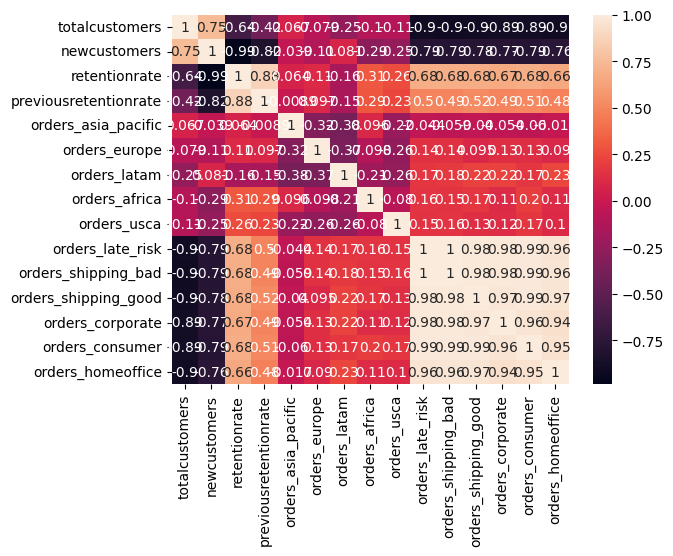

In [38]:
sns.heatmap(mom_crr_segments.loc[:, mom_crr_segments.columns != "yearmonth"].corr(), annot=True)
plt.show()